In [8]:
import sys
import os
import random
import numpy as np
import pandas as pd
import shutil
import sklearn
from sklearn.metrics import roc_auc_score, log_loss, f1_score, confusion_matrix, classification_report
import cv2
from sklearn.preprocessing import LabelEncoder

In [3]:
dir_path = "../Data/carbon_reduction/else"

total_test_img_paths = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        total_test_img_paths.append(folder+'/'+img)
print(len(total_test_img_paths))

24250


In [4]:
## Pandas Test 데이터프레임 만들기
tst_df = pd.DataFrame(total_test_img_paths, columns=['image_id'])
tst_df['dir'] = tst_df['image_id'].apply(lambda x: os.path.dirname(x))
tst_df['image_id'] = tst_df['image_id'].apply(lambda x: os.path.basename(x))
test = tst_df
test

image_id                            dir
0      else25734.jpg  ../Data/carbon_reduction/else
1      else22750.jpg  ../Data/carbon_reduction/else
2       else5731.jpg  ../Data/carbon_reduction/else
3       else5493.jpg  ../Data/carbon_reduction/else
4      else29154.jpg  ../Data/carbon_reduction/else
...              ...                            ...
24245  else24476.jpg  ../Data/carbon_reduction/else
24246  else11292.jpg  ../Data/carbon_reduction/else
24247  else41223.jpg  ../Data/carbon_reduction/else
24248   else3604.jpg  ../Data/carbon_reduction/else
24249   else8627.jpg  ../Data/carbon_reduction/else

[24250 rows x 2 columns]

In [5]:
model_name = 'inception_resnet_v2'
model_dir = model_name + '/inception_resnet_v2_2'
%run inference.ipynb

100%|█████████████████████████████████████████| 190/190 [02:10<00:00,  1.45it/s]


In [6]:
encoded_labels = ["10kwalking","public_vehicle",'stair','pet','outlet','else', 'can', 'box', 'milk', 'cup']
le = LabelEncoder()
le.fit(encoded_labels)
test['pred'] = le.inverse_transform(test['pred'])
test


image_id                            dir  pred
0      else25734.jpg  ../Data/carbon_reduction/else  else
1      else22750.jpg  ../Data/carbon_reduction/else  else
2       else5731.jpg  ../Data/carbon_reduction/else  else
3       else5493.jpg  ../Data/carbon_reduction/else  else
4      else29154.jpg  ../Data/carbon_reduction/else  else
...              ...                            ...   ...
24245  else24476.jpg  ../Data/carbon_reduction/else  else
24246  else11292.jpg  ../Data/carbon_reduction/else  else
24247  else41223.jpg  ../Data/carbon_reduction/else  else
24248   else3604.jpg  ../Data/carbon_reduction/else  else
24249   else8627.jpg  ../Data/carbon_reduction/else  else

[24250 rows x 3 columns]

In [11]:
test.to_csv('test_result/else_result.csv', index=False)

### classifying ELSE images to 4 classes

In [2]:
import json
import jsonlines
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import random

In [3]:
test= pd.read_csv('test_result/else_result.csv')
test

image_id                            dir  pred
0      else25734.jpg  ../Data/carbon_reduction/else  else
1      else22750.jpg  ../Data/carbon_reduction/else  else
2       else5731.jpg  ../Data/carbon_reduction/else  else
3       else5493.jpg  ../Data/carbon_reduction/else  else
4      else29154.jpg  ../Data/carbon_reduction/else  else
...              ...                            ...   ...
24245  else24476.jpg  ../Data/carbon_reduction/else  else
24246  else11292.jpg  ../Data/carbon_reduction/else  else
24247  else41223.jpg  ../Data/carbon_reduction/else  else
24248   else3604.jpg  ../Data/carbon_reduction/else  else
24249   else8627.jpg  ../Data/carbon_reduction/else  else

[24250 rows x 3 columns]

In [4]:
test['pred'].value_counts()

else              22817
pet                 343
can                 247
outlet              191
cup                 171
public_vehicle      151
milk                134
stair                77
box                  69
10kwalking           50
Name: pred, dtype: int64

In [18]:
tmp_list = []
label = test[test.pred == '10kwalking']

label.sort_values(by=['image_id'],ascending=True, inplace=True)
label.reset_index(inplace=True, drop=True)
tmp = label['image_id'].value_counts().index.sort_values()
label

/tmp/ipykernel_67493/4111281888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label.sort_values(by=['image_id'],ascending=True, inplace=True)


image_id                            dir        pred
0   else10208.jpg  ../Data/carbon_reduction/else  10kwalking
1   else11260.jpg  ../Data/carbon_reduction/else  10kwalking
2   else13661.jpg  ../Data/carbon_reduction/else  10kwalking
3   else13859.jpg  ../Data/carbon_reduction/else  10kwalking
4   else16200.jpg  ../Data/carbon_reduction/else  10kwalking
5   else16438.jpg  ../Data/carbon_reduction/else  10kwalking
6   else16784.jpg  ../Data/carbon_reduction/else  10kwalking
7   else17941.jpg  ../Data/carbon_reduction/else  10kwalking
8   else18188.jpg  ../Data/carbon_reduction/else  10kwalking
9   else19534.jpg  ../Data/carbon_reduction/else  10kwalking
10  else19844.jpg  ../Data/carbon_reduction/else  10kwalking
11  else20265.jpg  ../Data/carbon_reduction/else  10kwalking
12  else22308.jpg  ../Data/carbon_reduction/else  10kwalking
13  else24004.jpg  ../Data/carbon_reduction/else  10kwalking
14  else24950.jpg  ../Data/carbon_reduction/else  10kwalking
15  else24955.jpg  ../Data/carbon_reduction/else  10kwalking
16  else25332.jpg  ../Data/carbon_reduction/else  10kwalking
17  else25938.jpg  ../Data/carbon_reduction/else  10kwalking
18  else26017.jpg  ../Data/carbon_reduction/else  10kwalking
19  else26636.jpg  ../Data/carbon_reduction/else  10kwalking
20  else27579.jpg  ../Data/carbon_reduction/else  10kwalking
21  else27763.jpg  ../Data/carbon_reduction/else  10kwalking
22  else28817.jpg  ../Data/carbon_reduction/else  10kwalking
23  else29125.jpg  ../Data/carbon_reduction/else  10kwalking
24  else30587.jpg  ../Data/carbon_reduction/else  10kwalking
25  else31869.jpg  ../Data/carbon_reduction/else  10kwalking
26  else32128.jpg  ../Data/carbon_reduction/else  10kwalking
27  else32240.jpg  ../Data/carbon_reduction/else  10kwalking
28  else32491.jpg  ../Data/carbon_reduction/else  10kwalking
29  else33572.jpg  ../Data/carbon_reduction/else  10kwalking
30     else35.jpg  ../Data/carbon_reduction/else  10kwalking
31  else36943.jpg  ../Data/carbon_reduction/else  10kwalking
32  else37490.jpg  ../Data/carbon_reduction/else  10kwalking
33  else38152.jpg  ../Data/carbon_reduction/else  10kwalking
34  else38314.jpg  ../Data/carbon_reduction/else  10kwalking
35  else39319.jpg  ../Data/carbon_reduction/else  10kwalking
36  else39657.jpg  ../Data/carbon_reduction/else  10kwalking
37  else39959.jpg  ../Data/carbon_reduction/else  10kwalking
38  else40554.jpg  ../Data/carbon_reduction/else  10kwalking
39  else43097.jpg  ../Data/carbon_reduction/else  10kwalking
40    else467.jpg  ../Data/carbon_reduction/else  10kwalking
41   else5160.jpg  ../Data/carbon_reduction/else  10kwalking
42   else6270.jpg  ../Data/carbon_reduction/else  10kwalking
43   else6313.jpg  ../Data/carbon_reduction/else  10kwalking
44   else6526.jpg  ../Data/carbon_reduction/else  10kwalking
45   else8159.jpg  ../Data/carbon_reduction/else  10kwalking
46   else9086.jpg  ../Data/carbon_reduction/else  10kwalking
47   else9101.jpg  ../Data/carbon_reduction/else  10kwalking
48   else9394.jpg  ../Data/carbon_reduction/else  10kwalking
49   else9865.jpg  ../Data/carbon_reduction/else  10kwalking

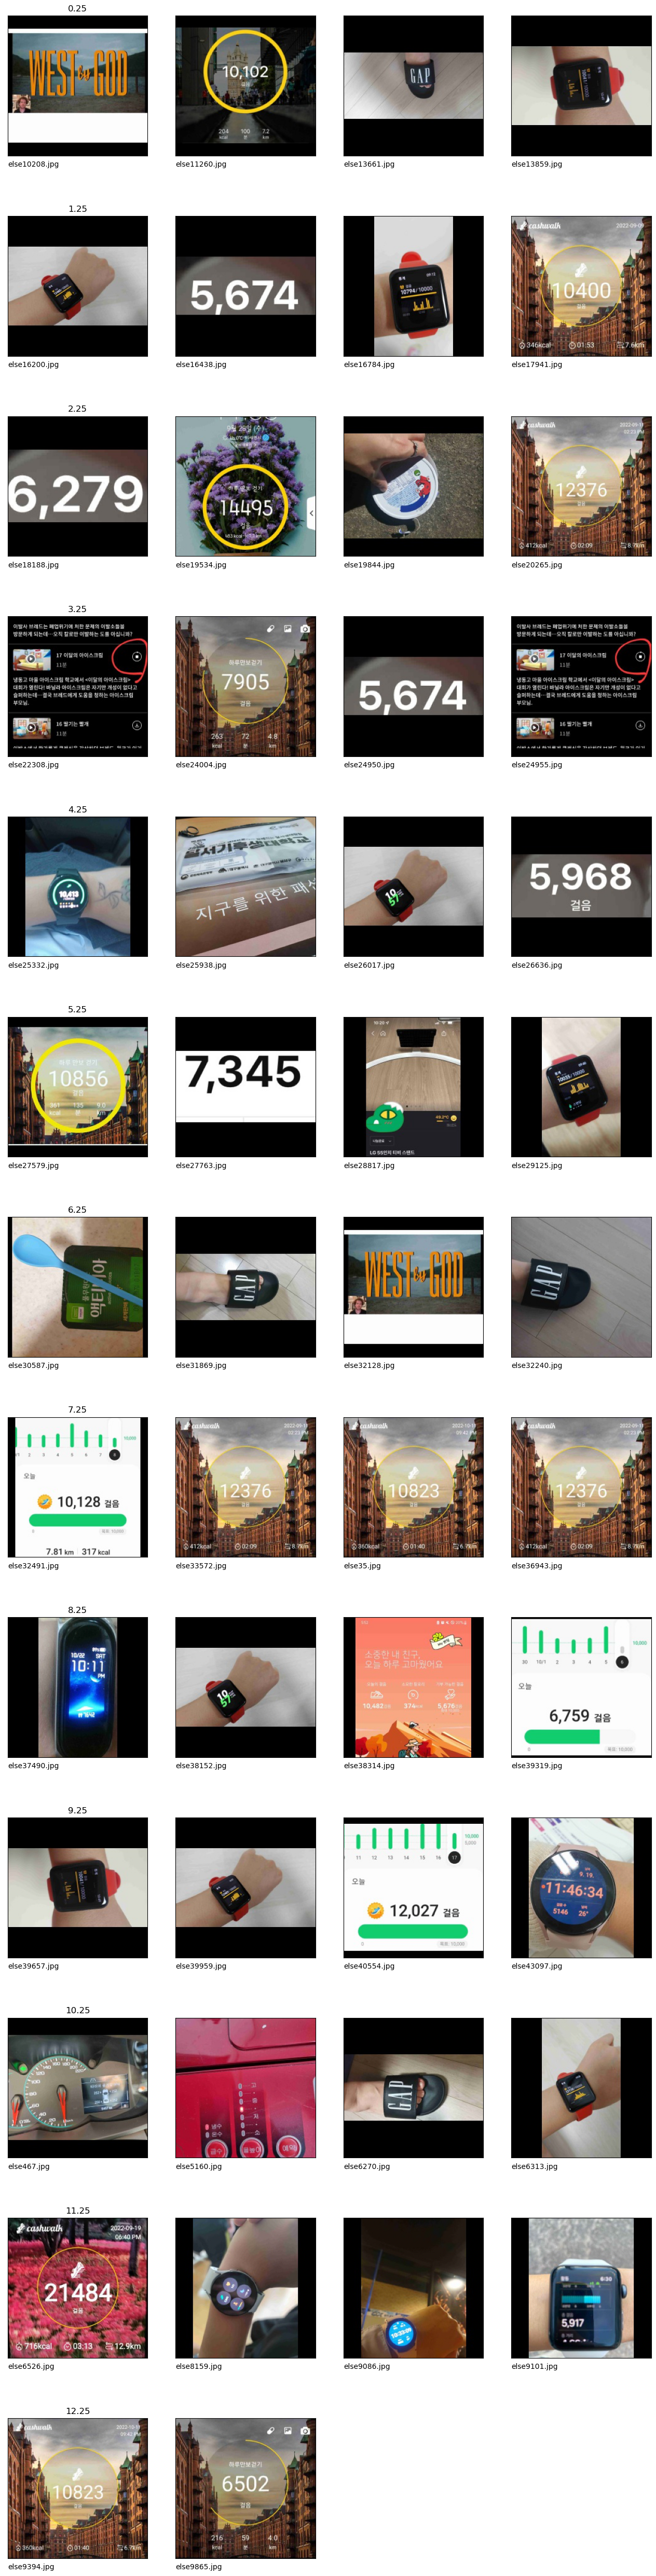

In [19]:
## show img status

back = 0
plt.figure(figsize=(16,500))
for i in range(len(label[:400])):
    plt.subplot(100,4,i+1)
    if i % 4 == 0:
        plt.title(f"{(i+1+back)/4}")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
        
    path = label['dir'][i] + '/' + label['image_id'][i]
    try:
    # im_bgr = cv2.imread(path)
    # im_rgb = im_bgr[:, :, ::-1]
        temp = Image.open(path).convert("RGB")
        image = np.array(temp).copy()
        temp.close()

        plt.imshow(image, cmap=plt.cm.binary)
        plt.xlabel(label['image_id'][i], loc='left', fontsize=10)
    except:
        plt.xlabel(path, loc='left', fontsize=10)
        
plt.show()

In [ ]:
cnt = 4
for i,key in enumerate(tmp):
    if cnt == 4:
        print('', end='\n\n\n\n')
        print(f'{(i+1)/4}.')
        cnt = 0
    print(f"'{key}'", end=' ')
    cnt+=1


In [97]:
else_to_cup = ['else39779.jpg','else10147.jpg', 'else10785.jpg', 'else10969.jpg', 'else11331.jpg','else12080.jpg','else13232.jpg','else14870.jpg','else15204.jpg','else16660.jpg','else17953.jpg', 'else18367.jpg','else20621.jpg', 'else21453.jpg', 'else22254.jpg','else22706.jpg','else23628.jpg','else28128.jpg','else28484.jpg','else28729.jpg','else29261.jpg','else30252.jpg','else31922.jpg','else33400.jpg','else34163.jpg','else34334.jpg','else35849.jpg','else36780.jpg','else37740.jpg', 'else3936.jpg','else40746.jpg', 'else4129.jpg','else41737.jpg','else42675.jpg','else5938.jpg','else5981.jpg','else6494.jpg', 'else6735.jpg','else8614.jpg', 'else950.jpg']




In [107]:
else_to_stair = tmp
print(else_to_stair)

Index(['else10085.jpg', 'else10094.jpg', 'else10195.jpg', 'else1039.jpg',
       'else10419.jpg', 'else10531.jpg', 'else10696.jpg', 'else10812.jpg',
       'else10985.jpg', 'else11225.jpg',
       ...
       'else8660.jpg', 'else9118.jpg', 'else9119.jpg', 'else9160.jpg',
       'else947.jpg', 'else9568.jpg', 'else9680.jpg', 'else9838.jpg',
       'else9850.jpg', 'else9972.jpg'],
      dtype='object', length=341)


### move files to another

In [20]:
# Move multiple files
files_to_move = tmp
destination_folder = '../Data/carbon_reduction/temp/'
origin_folder = '../Data/carbon_reduction/else/'

for file in files_to_move:
    try:
        file = origin_folder + file
        shutil.move(file, destination_folder)
        print(f"File '{file}' has been moved to '{destination_folder}'.")
    except FileNotFoundError:
        print(f"File '{file}' not found.")

File '../Data/carbon_reduction/else/else10208.jpg' has been moved to '../Data/carbon_reduction/temp/'.
File '../Data/carbon_reduction/else/else11260.jpg' has been moved to '../Data/carbon_reduction/temp/'.
File '../Data/carbon_reduction/else/else13661.jpg' has been moved to '../Data/carbon_reduction/temp/'.
File '../Data/carbon_reduction/else/else13859.jpg' has been moved to '../Data/carbon_reduction/temp/'.
File '../Data/carbon_reduction/else/else16200.jpg' has been moved to '../Data/carbon_reduction/temp/'.
File '../Data/carbon_reduction/else/else16438.jpg' has been moved to '../Data/carbon_reduction/temp/'.
File '../Data/carbon_reduction/else/else16784.jpg' has been moved to '../Data/carbon_reduction/temp/'.
File '../Data/carbon_reduction/else/else17941.jpg' has been moved to '../Data/carbon_reduction/temp/'.
File '../Data/carbon_reduction/else/else18188.jpg' has been moved to '../Data/carbon_reduction/temp/'.
File '../Data/carbon_reduction/else/else19534.jpg' has been moved to '../